In [9]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [12]:
id = [1, 2, 3, 4, 5, 6, 7, 8]
area = [75, 35, 15, 50, 85, 72, 120, 90]
precio = [200, 120, 210, 155, 300, 240, 245, 250]

datos = pd.DataFrame({'id': id, 'Area': area, 'Precio': precio})
datos.head(8)

,id,Area,Precio
0,1,75,200
1,2,35,120
2,3,15,210
3,4,50,155
4,5,85,300
5,6,72,240
6,7,120,245
7,8,90,250


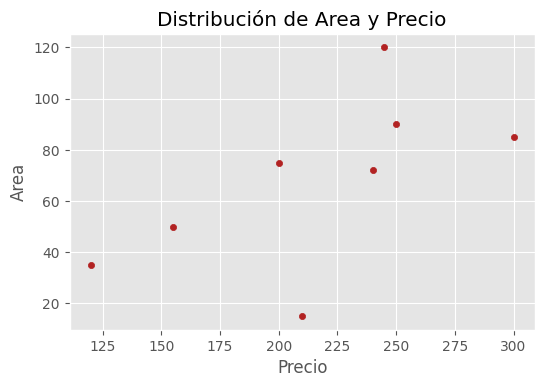

In [16]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'Precio',
    y    = 'Area',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Area y Precio');